In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

#LOAD DATA
xTrain = np.loadtxt("traindata.csv", delimiter =',')
yTrain = np.loadtxt("trainlabel.csv", delimiter =',')
xValid = np.loadtxt("validdata.csv", delimiter =',')
yValid = np.loadtxt("validlabel.csv", delimiter =',')

#CONVERT FROM NUMPY ARRAY TO PYTORCH TENSORS
Tdata = torch.from_numpy(xTrain) #(200,9)
Tlabel = torch.from_numpy(yTrain) #(200)
Vdata = torch.from_numpy(xValid) #(20,9)
Vlabel = torch.from_numpy(yValid) #(20)

#SET PARAMETERS
epochs = 16
learning_rate = 0.1
seed = 2

In [2]:
#SET RANDOM SEED 
torch.manual_seed(seed)

#DEFINE SNC CLASS IN PYTORCH
class SNC(nn.Module):
    def __init__(self):
        super(SNC, self).__init__()
        self.fc1 = nn.Linear(9 , 1)

    def forward(self, I):
        x = self.fc1(I)
        return x


In [3]:
#ACCURACY FUNCTION
def accuracy(predictions, label):
    totalCor = 0
    ind = 0
    
    for c in predictions.flatten():
        if (c.item()>0.5):
            r = 1.0
        else:
            r = 0.0
        
        if (r== label[ind].item()):
            totalCor += 1
        ind += 1
    
    return (totalCor/len(label))
    

In [4]:
#DISPLAYING WEIGHTS FUNCTION
def dispKernel(kernel, ksize, isize):
    # for normalizing
    kmax = max(kernel)
    kmin = min(kernel)
    spread = kmax - kmin
    # print("max,min",kmax,kmin)
    
    dsize = int(isize / ksize)
    # print("dsize:",dsize)

    a = np.full((isize, isize), 0.0)
    
    # loop through each element of kernel
    for i in range(ksize):
        for j in range(ksize):
            # fill in the image for this kernel element
            basei = i * dsize
            basej = j * dsize
            for k in range(dsize): 
                for l in range(dsize):
                    a[basei + k][basej + l] = (kernel[(i * ksize) + j] - kmin) / spread

    # print(a)

    x = np.uint8(a * 255)
    # print(x)
    img = Image.fromarray(x, mode='P')
    imshow(img, cmap='Greys_r')
    plt.show()

In [5]:
#INSTANTIATE AN SNC
smallNN = SNC()

#VISUALIZE AUTOMATICALLY CREATED PARAMETERS
print("Parameter Names and Initial (random) values: ")
for name, param in smallNN.named_parameters():
    print("name:",name, "value:", param)

Parameter Names and Initial (random) values: 
name: fc1.weight value: Parameter containing:
tensor([[ 0.0765, -0.0793,  0.0914, -0.0170,  0.1424,  0.0794, -0.0383, -0.2695,
          0.0761]], requires_grad=True)
name: fc1.bias value: Parameter containing:
tensor([-0.2951], requires_grad=True)


In [6]:
#DEFINE LOSS FUNCTION AND OPTIMIZER
loss_function = torch.nn.MSELoss() #Define the loss function using mean square error 

optimizer = torch.optim.SGD(smallNN.parameters(),lr=learning_rate) #Choose Stochastic Gradient Descent (SDG) approach

In [7]:
#STORAGE VARIABLES
lossRec = []
vlossRec = []
nRec = []
trainAccRec = []
validAccRec = [] 

In [8]:
###### TRAINING LOOP #####

for i in range(epochs):
    optimizer.zero_grad()
    predict = smallNN(Tdata.float()) #added the .float())
    loss = loss_function(input=predict.squeeze(), target=Tlabel.float())
    loss.backward()
    optimizer.step()

    trainAcc = accuracy(predict,Tlabel)

    #predict = smallNN(Vdata.float()) #added the .float())))
    #validAcc = accuracy(predict, Vlabel)
    
    predict = smallNN(Vdata.float()) #added the .float()))
    vloss = loss_function(input=predict.squeeze(), target=Vlabel.float())
    validAcc = accuracy(predict, Vlabel)    

    print("loss: ", f'{loss:.4f}'," trainAcc: ", f'{trainAcc:.4f}', " validAcc: ", f'{validAcc:.4f}')
    
    #Accumulating data for plotting
    lossRec.append(loss)
    vlossRec.append(vloss)
    nRec.append(i)
    trainAccRec.append(trainAcc)
    validAccRec.append(validAcc)


### END ###

loss:  0.3604  trainAcc:  0.6650  validAcc:  1.0000
loss:  0.1090  trainAcc:  0.9850  validAcc:  1.0000
loss:  0.0911  trainAcc:  0.9600  validAcc:  1.0000
loss:  0.0856  trainAcc:  0.9500  validAcc:  1.0000
loss:  0.0816  trainAcc:  0.9500  validAcc:  1.0000
loss:  0.0783  trainAcc:  0.9550  validAcc:  1.0000
loss:  0.0756  trainAcc:  0.9550  validAcc:  1.0000
loss:  0.0734  trainAcc:  0.9500  validAcc:  1.0000
loss:  0.0715  trainAcc:  0.9500  validAcc:  1.0000
loss:  0.0699  trainAcc:  0.9500  validAcc:  1.0000
loss:  0.0685  trainAcc:  0.9500  validAcc:  1.0000
loss:  0.0674  trainAcc:  0.9550  validAcc:  1.0000
loss:  0.0664  trainAcc:  0.9550  validAcc:  1.0000
loss:  0.0656  trainAcc:  0.9550  validAcc:  1.0000
loss:  0.0648  trainAcc:  0.9550  validAcc:  1.0000
loss:  0.0642  trainAcc:  0.9550  validAcc:  1.0000


[tensor(0.3604, grad_fn=<MseLossBackward>), tensor(0.1090, grad_fn=<MseLossBackward>), tensor(0.0911, grad_fn=<MseLossBackward>), tensor(0.0856, grad_fn=<MseLossBackward>), tensor(0.0816, grad_fn=<MseLossBackward>), tensor(0.0783, grad_fn=<MseLossBackward>), tensor(0.0756, grad_fn=<MseLossBackward>), tensor(0.0734, grad_fn=<MseLossBackward>), tensor(0.0715, grad_fn=<MseLossBackward>), tensor(0.0699, grad_fn=<MseLossBackward>), tensor(0.0685, grad_fn=<MseLossBackward>), tensor(0.0674, grad_fn=<MseLossBackward>), tensor(0.0664, grad_fn=<MseLossBackward>), tensor(0.0656, grad_fn=<MseLossBackward>), tensor(0.0648, grad_fn=<MseLossBackward>), tensor(0.0642, grad_fn=<MseLossBackward>)]


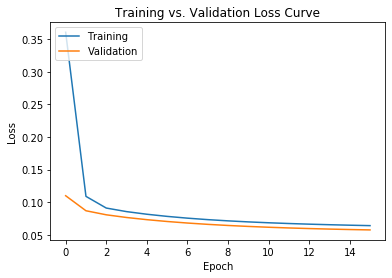

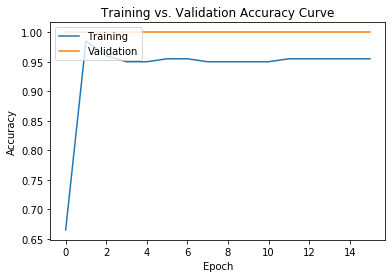

In [9]:
#PLOTTING 
print(lossRec)
plt.plot(nRec,lossRec,label = 'Train')
plt.plot(nRec,vlossRec,label = 'Validation')
plt.xlabel("Epoch")
plt.ylabel("Loss") 
plt.title("Training vs. Validation Loss Curve")
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show() 

plt.plot(nRec,trainAccRec,label = 'Train')
plt.plot(nRec,validAccRec,label = 'Validation')
plt.xlabel("Epoch")
plt.ylabel("Accuracy") 
plt.title("Training vs. Validation Accuracy Curve")
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

Model Weights
name: fc1.weight value: Parameter containing:
tensor([[ 0.2191, -0.1218,  0.1964, -0.1118,  0.2285, -0.0305,  0.1341, -0.2431,
          0.1987]], requires_grad=True)
name: fc1.bias value: Parameter containing:
tensor([-0.1725], requires_grad=True)
weights: [ 0.21913049 -0.12180535  0.19639425 -0.11176247  0.22847939 -0.03046213
  0.13409959 -0.24312453  0.1987359 ]
bias: -0.17247036


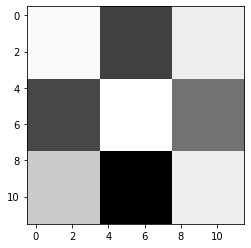

In [10]:
print("Model Weights")
for name, param in smallNN.named_parameters():
    print("name:",name, "value:", param)
    if (name =="fc1.weight"):
        weights = np.squeeze(param.detach().numpy())
    else:
        bias = np.squeeze(param.detach().numpy())

print("weights:", weights)
print("bias:", bias)

dispKernel(weights,3,12)